# DATA CHECKING

In [1]:
URL = "https://raw.githubusercontent.com/anhquanbui/finalprojectg7/main/COVID_Parcel_Business.csv"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv(URL)
df

,FakeCustomerID,THE_YEAR,THE_WEEK,VOLUME
0,718117,2021,1,8
1,718117,2020,7,257
2,718117,2019,39,141
3,718117,2018,1,14
4,718117,2021,2,192
...,...,...,...,...
190714,228893,2019,13,30
190715,228893,2019,38,122
190716,228893,2019,48,99
190717,228893,2019,20,61


In [4]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190719 entries, 0 to 190718
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   FakeCustomerID  190719 non-null  int64
 1   THE_YEAR        190719 non-null  int64
 2   THE_WEEK        190719 non-null  int64
 3   VOLUME          190719 non-null  int64
dtypes: int64(4)
memory usage: 5.8 MB


In [5]:
# Count distinct customer
unique_ids = df["FakeCustomerID"].unique()
print("Distinct customers:", len(unique_ids))

Distinct customers: 1061


# MAKING DIMENSION TABLES

In [6]:
# Customer Summary Table
customer_summary = df.groupby('FakeCustomerID').agg(
    Total_Volume=('VOLUME', 'sum'),           
    First_Year=('THE_YEAR', 'min'), 
    Last_Year=('THE_YEAR', 'max'),
    Weeks_Active=('THE_WEEK', 'count'),
    Avg_Weekly_Volume=('VOLUME', 'mean')
).reset_index()


print(customer_summary.head())

   FakeCustomerID  Total_Volume  First_Year  Last_Year  Weeks_Active  \
0          100771          6252        2018       2021           192   
1          102180         20553        2018       2021           193   
2          102643          8164        2018       2021           188   
3          102750          2747        2018       2021           140   
4          103308        326088        2018       2021           197   

   Avg_Weekly_Volume  
0          32.562500  
1         106.492228  
2          43.425532  
3          19.621429  
4        1655.269036  


In [7]:
# Weekly Aggregation Table
weekly_agg = df.groupby(['THE_YEAR', 'THE_WEEK']).agg(
    Total_Volume=('VOLUME', 'sum'),
    Num_Customers=('FakeCustomerID', 'nunique'),
    Avg_Volume_Per_Customer=('VOLUME', 'mean')
).reset_index()

print(weekly_agg.head())


   THE_YEAR  THE_WEEK  Total_Volume  Num_Customers  Avg_Volume_Per_Customer
0      2018         1        817751            872               937.787844
1      2018         2        925839            908              1019.646476
2      2018         3        854760            915               934.163934
3      2018         4        800040            914               875.317287
4      2018         5        812249            914               888.675055


In [8]:
# Yearly Summary Table
yearly_summary = df.groupby('THE_YEAR').agg(
    Total_Volume=('VOLUME', 'sum'), 
    Unique_Customers=('FakeCustomerID', 'nunique'),
    Avg_Volume_Per_Customer=('VOLUME', 'mean')
).reset_index()

print(yearly_summary)

   THE_YEAR  Total_Volume  Unique_Customers  Avg_Volume_Per_Customer
0      2018      49099478              1025               992.871431
1      2019      52823114              1061               994.130310
2      2020      73475690              1046              1428.487635
3      2021      48679668              1014              1326.566056


In [9]:
# Customer-Year Matrix Table
customer_year_matrix = df.pivot_table(
    index='FakeCustomerID',
    columns='THE_YEAR',
    values='VOLUME',
    aggfunc='sum',
    fill_value=0
).reset_index()

print(customer_year_matrix.head())


THE_YEAR  FakeCustomerID   2018   2019    2020   2021
0                 100771   1687   1816    1789    960
1                 102180   5525   5222    4817   4989
2                 102643   1910   2670    1703   1881
3                 102750   1040   1013     405    289
4                 103308  50321  90140  103700  81927


# TABLES PLOTS

**Yearly Summary**

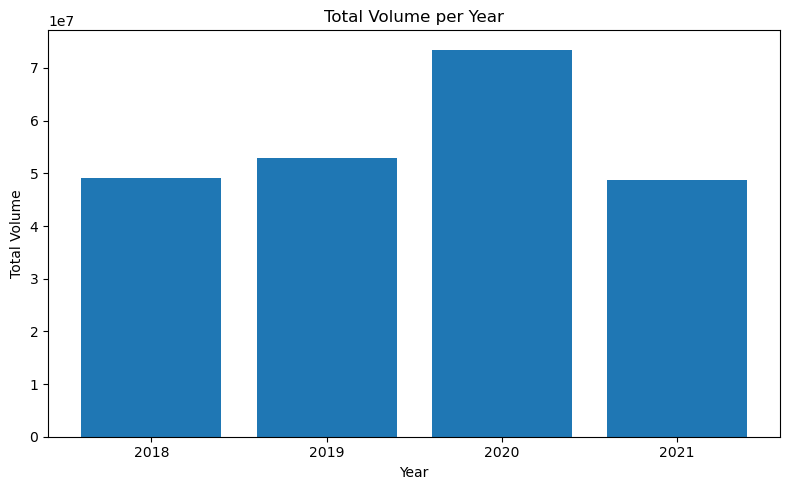

In [10]:
years = yearly_summary['THE_YEAR']
volume = yearly_summary['Total_Volume']

plt.figure(figsize=(8, 5))
plt.bar(x=years, height=volume)
plt.title('Total Volume per Year')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.xticks(years)
plt.tight_layout()
plt.show()

**Weekly Summary**

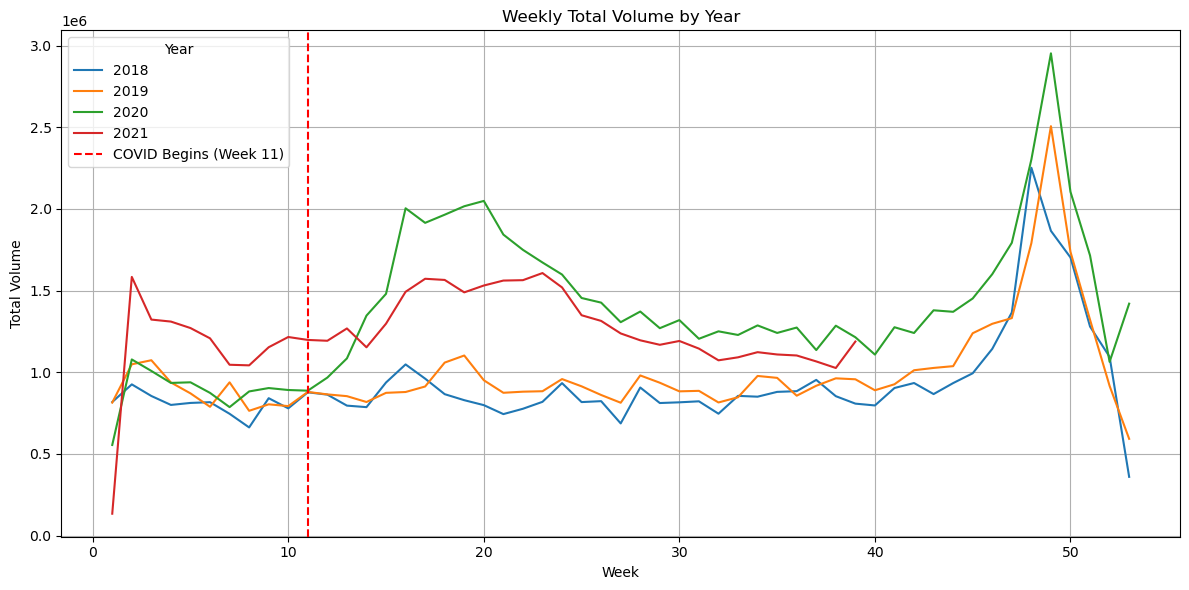

In [11]:
plt.figure(figsize=(12, 6))

for year in weekly_agg['THE_YEAR'].unique():
    data = weekly_agg[weekly_agg['THE_YEAR'] == year]
    plt.plot(data['THE_WEEK'], data['Total_Volume'], label=str(year))
plt.axvline(x=11, color='red', linestyle='--', label='COVID Begins (Week 11)')
plt.title('Weekly Total Volume by Year')
plt.xlabel('Week')
plt.ylabel('Total Volume')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

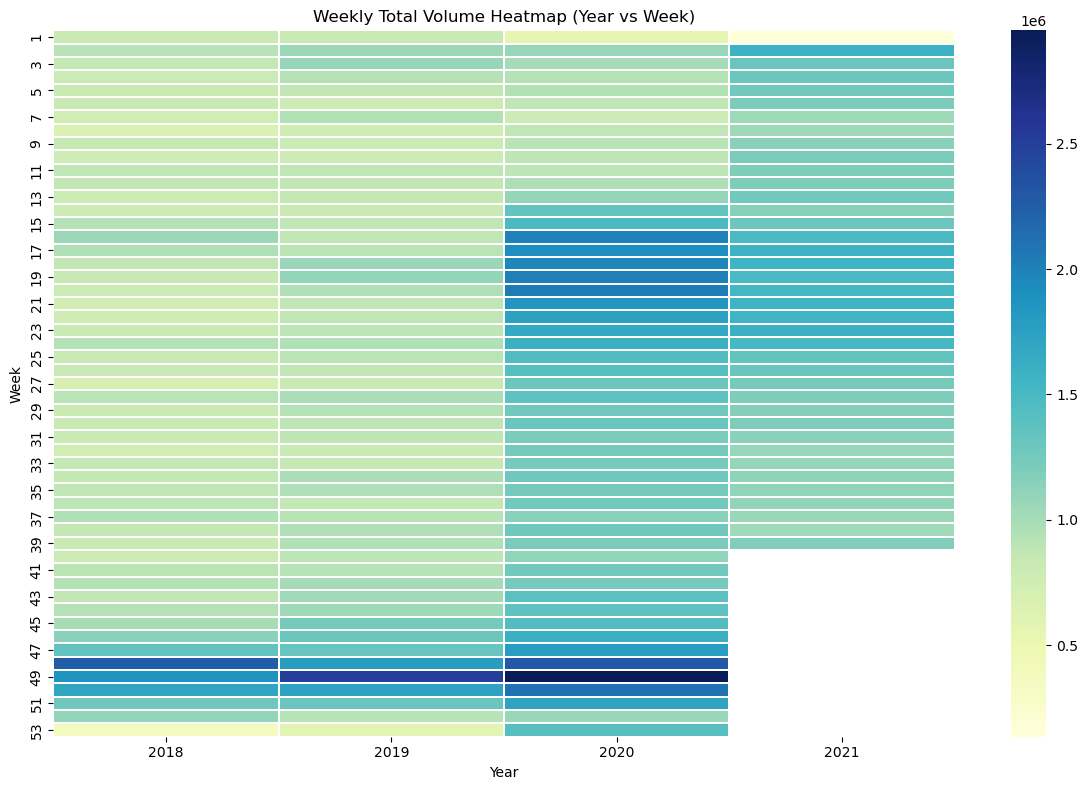

In [12]:
heatmap_data = weekly_agg.pivot(index='THE_WEEK', columns='THE_YEAR', values='Total_Volume')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.3)
plt.title('Weekly Total Volume Heatmap (Year vs Week)')
plt.xlabel('Year')
plt.ylabel('Week')
plt.tight_layout()
plt.show()

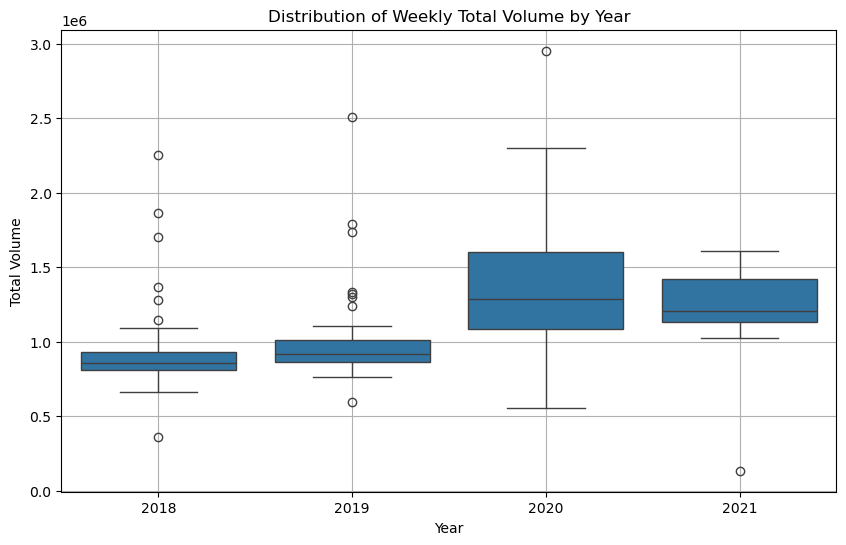

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=weekly_agg, x='THE_YEAR', y='Total_Volume')
plt.title('Distribution of Weekly Total Volume by Year')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.grid(True)
plt.show()

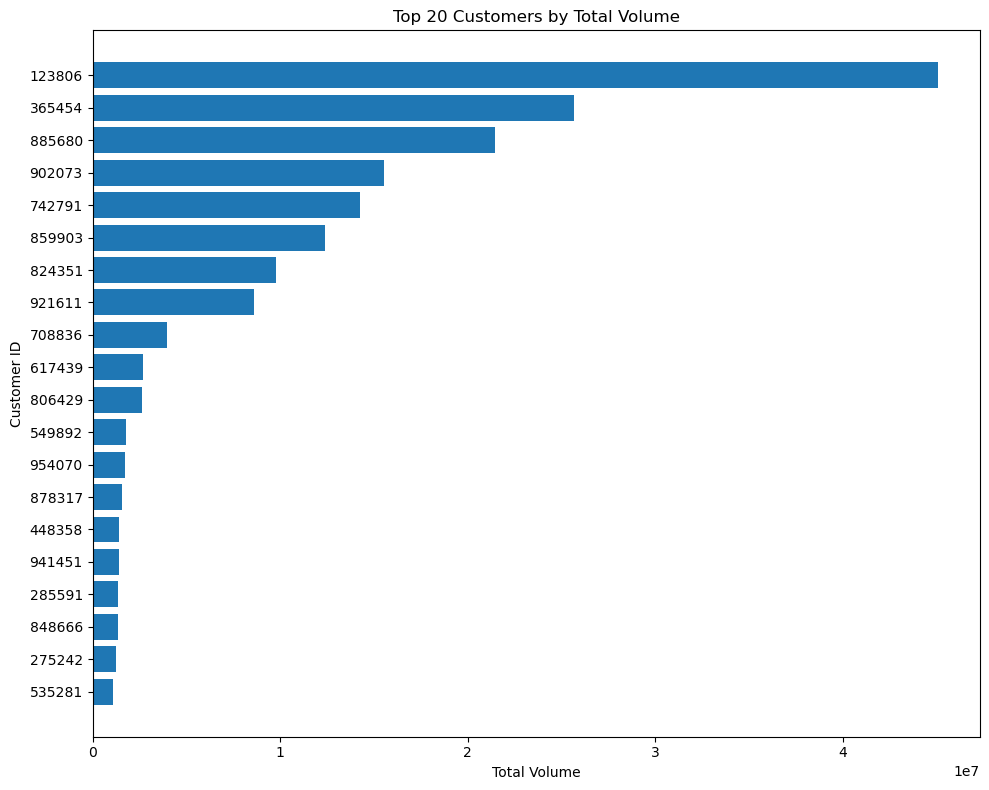

In [14]:
top_cust = customer_summary.sort_values('Total_Volume', ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(top_cust['FakeCustomerID'].astype(str), top_cust['Total_Volume'])
plt.gca().invert_yaxis()
plt.title('Top 20 Customers by Total Volume')
plt.xlabel('Total Volume')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()

### When were customer volumes first impacted by COVID-19?

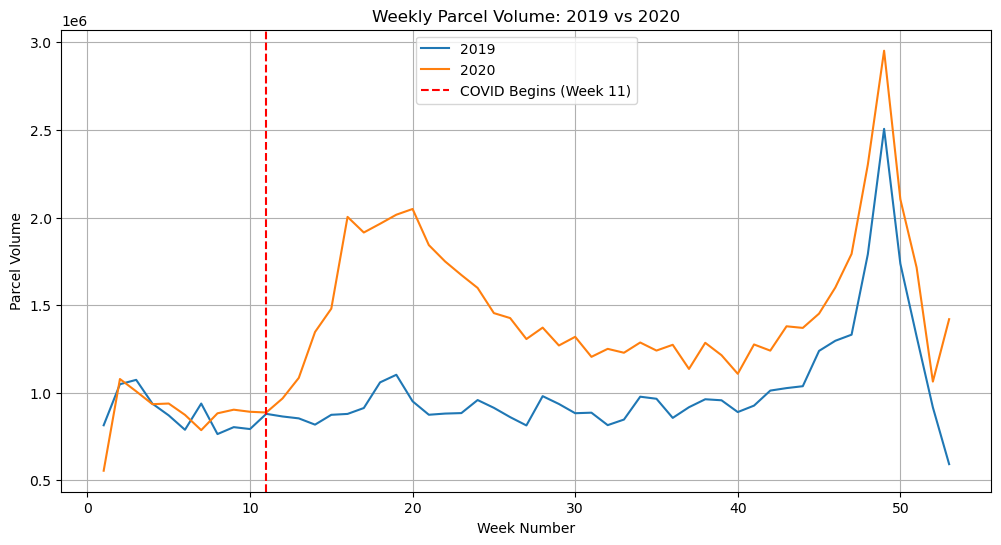

In [15]:
weekly_data = df.groupby(['THE_YEAR', 'THE_WEEK']).agg({'VOLUME': 'sum'}).reset_index()

# Split by year
volume_2019 = weekly_data[weekly_data['THE_YEAR'] == 2019]
volume_2020 = weekly_data[weekly_data['THE_YEAR'] == 2020]

# Plot
plt.figure(figsize=(12,6))
plt.plot(volume_2019['THE_WEEK'], volume_2019['VOLUME'], label='2019')
plt.plot(volume_2020['THE_WEEK'], volume_2020['VOLUME'], label='2020')

# Mark COVID start
plt.axvline(x=11, color='red', linestyle='--', label='COVID Begins (Week 11)')
plt.title('Weekly Parcel Volume: 2019 vs 2020')
plt.xlabel('Week Number')
plt.ylabel('Parcel Volume')
plt.legend()
plt.grid(True)
plt.show()

### What events within the COVID timeline may have contributed to the change?

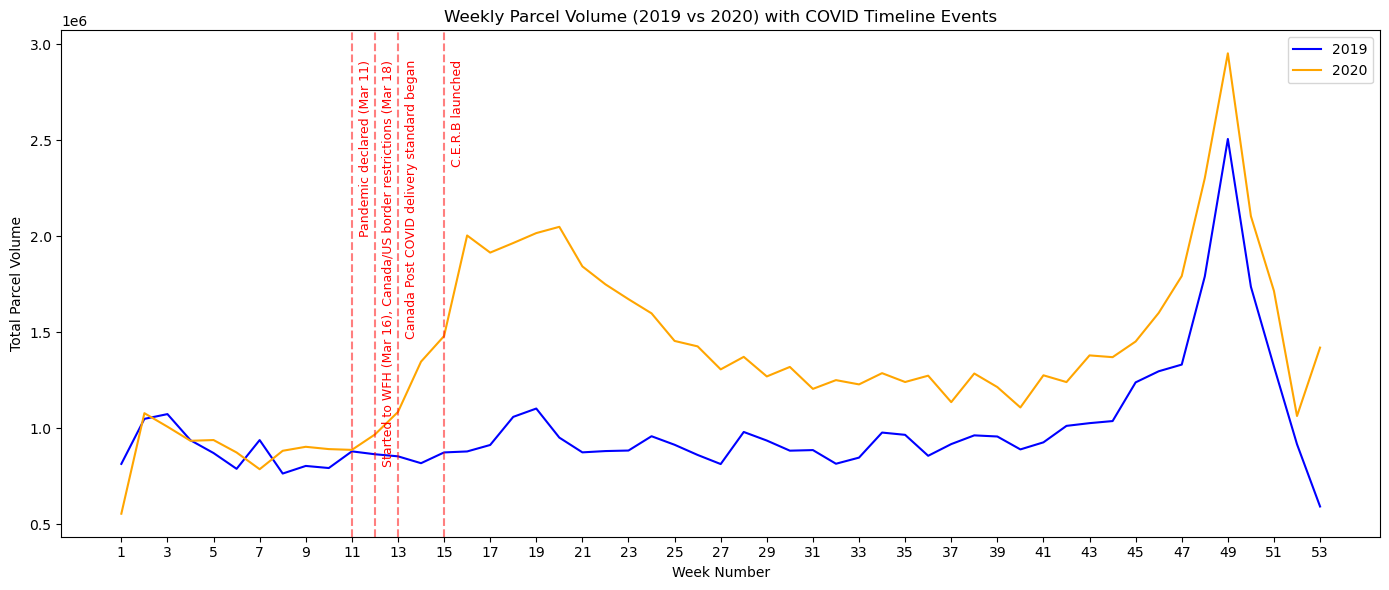

In [16]:
plt.figure(figsize=(14, 6))
plt.plot(volume_2019['THE_WEEK'], volume_2019['VOLUME'], label='2019', color='blue')
plt.plot(volume_2020['THE_WEEK'], volume_2020['VOLUME'], label='2020', color='orange')

# Annotate major COVID events
events = {
    11: "Pandemic declared (Mar 11)",
    12: "Started to WFH (Mar 16), Canada/US border restrictions (Mar 18)",
    13: "Canada Post COVID delivery standard began",
    15: "C.E.R.B launched"}

for week, label in events.items():
    plt.axvline(x=week, color='red', linestyle='--', alpha=0.5)
    plt.text(week + 0.3, plt.ylim()[1]*0.95, label, rotation=90, fontsize=9, color='red', verticalalignment='top')

# Set x-ticks for all weeks (or every 2-5 weeks for readability)
plt.xticks(ticks=range(1, 54, 2))  # You can change 2 to 1 or 5 depending on spacing

# Labels and layout
plt.title('Weekly Parcel Volume (2019 vs 2020) with COVID Timeline Events')
plt.xlabel('Week Number')
plt.ylabel('Total Parcel Volume')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

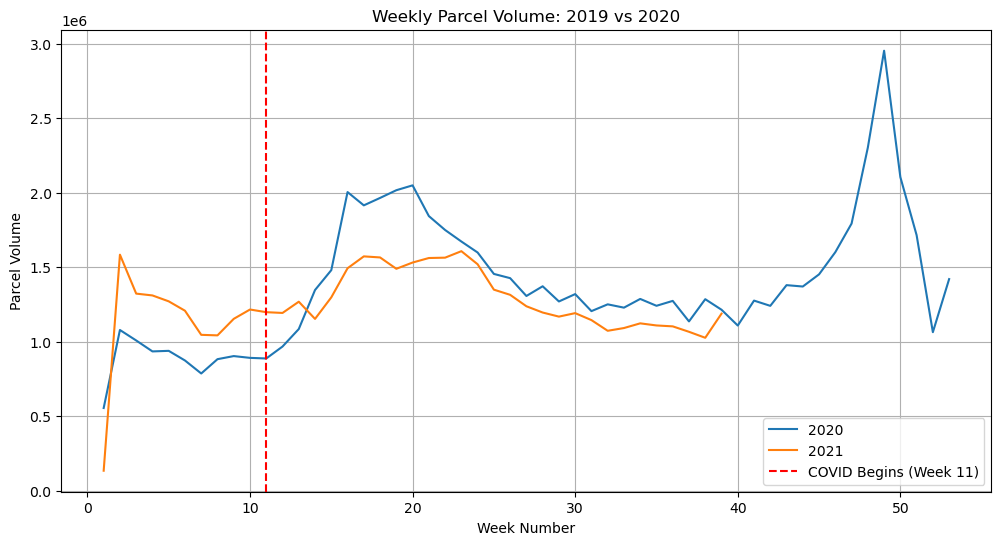

In [17]:

# Split by year
volume_2020 = weekly_data[weekly_data['THE_YEAR'] == 2020]
volume_2021 = weekly_data[weekly_data['THE_YEAR'] == 2021]

# Plot
plt.figure(figsize=(12,6))
plt.plot(volume_2020['THE_WEEK'], volume_2020['VOLUME'], label='2020')
plt.plot(volume_2021['THE_WEEK'], volume_2021['VOLUME'], label='2021')

# Mark COVID start
plt.axvline(x=11, color='red', linestyle='--', label='COVID Begins (Week 11)')
plt.title('Weekly Parcel Volume: 2019 vs 2020')
plt.xlabel('Week Number')
plt.ylabel('Parcel Volume')
plt.legend()
plt.grid(True)
plt.show()

### How did COVID-19 impact peak season in 2020?

In [18]:
# Filter peak season (Weeks 45-53) for both years
peak_weeks = list(range(45, 54))

vol_2019_peak = volume_2019[volume_2019['THE_WEEK'].isin(peak_weeks)]
vol_2020_peak = volume_2020[volume_2020['THE_WEEK'].isin(peak_weeks)]

# Compare total volume
total_2019 = vol_2019_peak['VOLUME'].sum()
total_2020 = vol_2020_peak['VOLUME'].sum()

impact_percent = ((total_2020 - total_2019) / total_2019) * 100

print(f"Total Peak Volume 2019: {total_2019:,.0f}")
print(f"Total Peak Volume 2020: {total_2020:,.0f}")
print(f"COVID Impact on Peak Season: {impact_percent:.2f}% increase")

Total Peak Volume 2019: 12,731,239
Total Peak Volume 2020: 16,402,470
COVID Impact on Peak Season: 28.84% increase


## ISGR and labels

In [19]:
def calculate_isgr(df, year_before, year_after, max_week=15):
    vol_before = df[(df['THE_YEAR'] == year_before) & (df['THE_WEEK'] <= max_week)]['VOLUME'].sum()
    vol_after = df[(df['THE_YEAR'] == year_after) & (df['THE_WEEK'] <= max_week)]['VOLUME'].sum()
    
    isgr = (vol_after - vol_before) / vol_before
    return vol_before, vol_after, isgr, round(isgr * 100, 2)

results = []
for y1, y2 in [(2018, 2019), (2019, 2020), (2020, 2021)]:
    v1, v2, isgr_raw, isgr_percent = calculate_isgr(df, y1, y2)
    results.append({
        'From Year': y1,
        'To Year': y2,
        'Volume Before': v1,
        'Volume After': v2,
        'ISGR': isgr_raw,
        'ISGR %': f"{isgr_percent}%"
    })

isgr_df = pd.DataFrame(results)
print(isgr_df)

   From Year  To Year  Volume Before  Volume After      ISGR ISGR %
0       2018     2019       12316054      13122816  0.065505  6.55%
1       2019     2020       13122816      14619017  0.114015  11.4%
2       2020     2021       14619017      17395950  0.189953  19.0%


In [20]:
df_period = df[df['THE_WEEK'] <= 15]

volume_by_customer_year = df_period.groupby(['FakeCustomerID', 'THE_YEAR'])['VOLUME'].sum().unstack(fill_value=0)

def compute_isgr(v1, v2):
    return (v2 - v1) / v1 if v1 > 0 else None

isgr_1819 = compute_isgr(volume_by_customer_year[2018].sum(), volume_by_customer_year[2019].sum())
isgr_1920 = compute_isgr(volume_by_customer_year[2019].sum(), volume_by_customer_year[2020].sum())
isgr_2021 = compute_isgr(volume_by_customer_year[2020].sum(), volume_by_customer_year[2021].sum())

def classify_growth(v_before, v_after, isgr):
    if v_before == 0 and v_after > 0:
        return "New"
    elif v_before > 0 and v_after == 0:
        return "Lost"
    elif v_before == 0 and v_after == 0:
        return "Inactive"
    else:
        growth = (v_after - v_before) / v_before
        if growth > isgr:
            return "High Growth"
        elif growth >= 0:
            return "Stable"
        else:
            return "Declining"

volume_by_customer_year['Label_18_19'] = volume_by_customer_year.apply(
    lambda row: classify_growth(row[2018], row[2019], isgr_1819), axis=1)

volume_by_customer_year['Label_19_20'] = volume_by_customer_year.apply(
    lambda row: classify_growth(row[2019], row[2020], isgr_1920), axis=1)

volume_by_customer_year['Label_20_21'] = volume_by_customer_year.apply(
    lambda row: classify_growth(row[2020], row[2021], isgr_2021), axis=1)

volume_by_customer_year.reset_index(inplace=True)
volume_by_customer_year[['FakeCustomerID', 'Label_18_19', 'Label_19_20', 'Label_20_21']].head()

THE_YEAR,FakeCustomerID,Label_18_19,Label_19_20,Label_20_21
0,100771,Declining,Stable,Declining
1,102180,Declining,Declining,High Growth
2,102643,High Growth,Declining,Stable
3,102750,High Growth,Declining,Declining
4,103308,Declining,High Growth,High Growth


In [21]:
volume_by_customer_year

THE_YEAR,FakeCustomerID,2018,2019,2020,2021,Label_18_19,Label_19_20,Label_20_21
0,100771,446,442,448,412,Declining,Stable,Declining
1,102180,1664,1365,828,1212,Declining,Declining,High Growth
2,102643,147,745,599,695,High Growth,Declining,Stable
3,102750,274,344,196,172,High Growth,Declining,Declining
4,103308,25588,19560,23748,34015,Declining,High Growth,High Growth
...,...,...,...,...,...,...,...,...
1053,994361,775,681,778,436,Declining,High Growth,Declining
1054,994762,266,265,303,171,Declining,High Growth,Declining
1055,995173,94,483,315,1313,High Growth,Declining,High Growth
1056,999141,768,900,1114,970,High Growth,High Growth,Declining


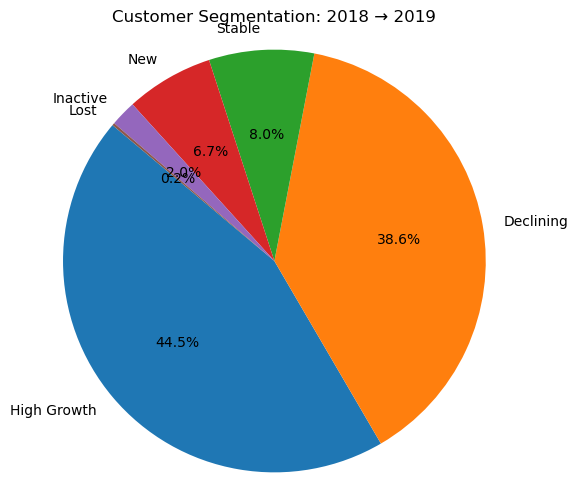

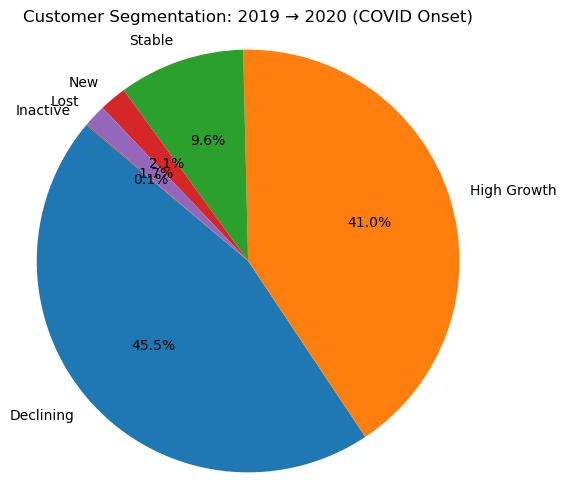

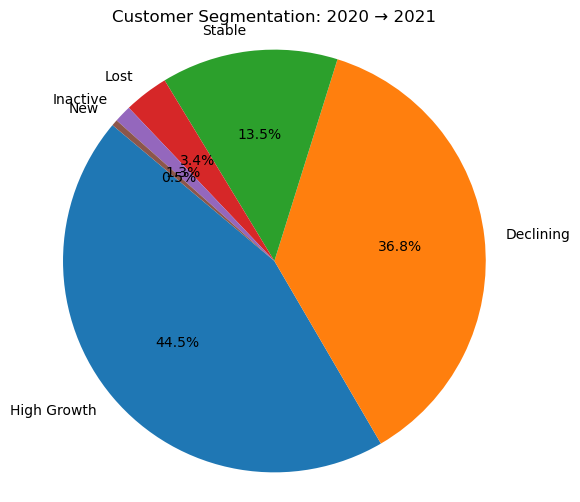

In [22]:
def plot_label_distribution(column_name, title):
    label_counts = volume_by_customer_year[column_name].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')
    plt.show()

plot_label_distribution('Label_18_19', 'Customer Segmentation: 2018 → 2019')
plot_label_distribution('Label_19_20', 'Customer Segmentation: 2019 → 2020 (COVID Onset)')
plot_label_distribution('Label_20_21', 'Customer Segmentation: 2020 → 2021')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190719 entries, 0 to 190718
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   FakeCustomerID  190719 non-null  int64
 1   THE_YEAR        190719 non-null  int64
 2   THE_WEEK        190719 non-null  int64
 3   VOLUME          190719 non-null  int64
dtypes: int64(4)
memory usage: 5.8 MB
